In [5]:
import numpy as np # کار کردن با ماتریس
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [7]:
dataF5 = pd.read_excel('Book5.xlsx')
data_test = pd.read_excel('Book6-testModel.xlsx')

In [8]:
dataF5_without_task_variant=dataF5[['p1','k1','s1','t1','a1','p2','k2','s2','t2','a2','p3','k3','s3','t3','a3','p4','k4','s4','t4','a4','p5','k5','s5','t5','a5'
]]
dataF5_without_task_variant


,p1,k1,s1,t1,a1,p2,k2,s2,t2,a2,...,p4,k4,s4,t4,a4,p5,k5,s5,t5,a5
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,1,1,1,1,0,1,1,0,...,1,1,0,1,0,1,1,1,1,1
9996,1,1,0,0,1,0,1,0,0,0,...,0,1,0,1,1,1,1,0,1,0
9997,1,1,0,1,0,0,1,1,0,1,...,1,1,1,0,1,1,1,1,1,1
9998,1,1,1,0,1,1,1,1,1,0,...,0,1,1,1,0,1,1,0,1,0


In [9]:
dataF5_with_task_variant=dataF5[['task_variant']]
dataF5_with_task_variant

,task_variant
0,1
1,1
2,1
3,3
4,1
...,...
9995,1
9996,3
9997,2
9998,1


In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(dataF5_without_task_variant,dataF5_with_task_variant,test_size=0.2,random_state=0)

print(f'len(X_train)=\n{len(X_train)}\nlen(X_test)=\n{len(X_test)}\nlen(Y_train)=\n{len(Y_train)}\nlen(Y_test)=\n{len(Y_test)}\n')
print('-------------------------------')
print(f'X_train=\n{X_train}\n\nX_test=\n{X_test}\n\nY_train=\n{Y_train}\n\nY_test=\n{Y_test}\n')

len(X_train)=
8000
len(X_test)=
2000
len(Y_train)=
8000
len(Y_test)=
2000

-------------------------------
X_train=
      p1  k1  s1  t1  a1  p2  k2  s2  t2  a2  ...  p4  k4  s4  t4  a4  p5  k5  \
7389   1   1   1   1   0   1   1   0   1   1  ...   1   0   1   0   1   0   0   
9275   1   1   1   1   1   1   0   1   1   1  ...   1   1   1   1   1   0   1   
2995   1   1   1   1   1   1   0   1   1   1  ...   0   0   0   0   0   0   0   
5316   1   1   1   1   1   0   1   1   1   1  ...   0   0   0   0   0   0   0   
356    1   1   1   1   1   0   0   0   0   0  ...   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
9225   1   0   1   1   1   1   1   1   1   0  ...   0   1   0   1   0   1   1   
4859   1   0   1   1   0   1   0   1   1   1  ...   0   0   0   0   0   0   0   
3264   1   1   1   1   1   1   0   0   1   1  ...   0   0   0   0   0   0   0   
9845   0   0   1   1   1   0   1   0   0   1  ...   0   0   1   1   1   1 

In [23]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
knn.fit(X_train,Y_train)
y_prediction=knn.predict(X_test)
print(f'y_prediction={y_prediction}\ny_test=      {Y_test}')

C:\Users\parspooya\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


y_prediction=[2 1 3 ... 1 1 2]
y_test=            task_variant
9394             2
898              1
2398             3
5906             1
2343             1
...            ...
1037             1
2899             1
9549             1
2740             1
6690             2

[2000 rows x 1 columns]


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_prediction = knn.predict(X_test)

accuracy = accuracy_score(Y_test, y_prediction)
precision = precision_score(Y_test, y_prediction, average='weighted')
recall = recall_score(Y_test, y_prediction, average='weighted')  
f1 = f1_score(Y_test, y_prediction, average='weighted') 
conf_matrix = confusion_matrix(Y_test, y_prediction)
class_report = classification_report(Y_test, y_prediction)


print(f'y_prediction = {y_prediction}\ny_test = {Y_test}')
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}\n')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

y_prediction = [2 1 3 ... 1 1 2]
y_test =       task_variant
9394             2
898              1
2398             3
5906             1
2343             1
...            ...
1037             1
2899             1
9549             1
2740             1
6690             2

[2000 rows x 1 columns]
Accuracy: 85.95%
Precision: 0.86
Recall: 0.86
F1 Score: 0.86

Confusion Matrix:
[[962  23   2]
 [149 429  20]
 [ 14  73 328]]
Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.97      0.91       987
           2       0.82      0.72      0.76       598
           3       0.94      0.79      0.86       415

    accuracy                           0.86      2000
   macro avg       0.87      0.83      0.84      2000
weighted avg       0.86      0.86      0.86      2000



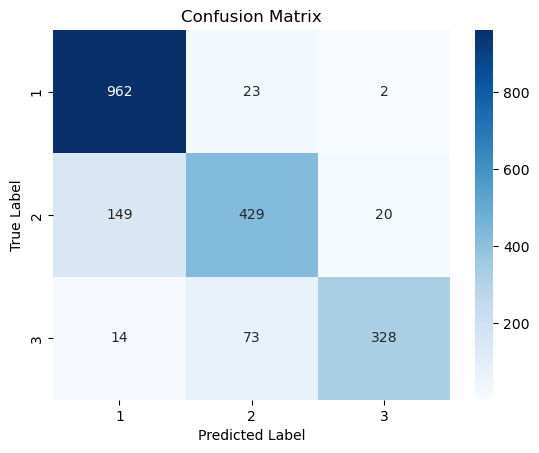

In [19]:
# ماتریس آشفتگی
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, y_prediction)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


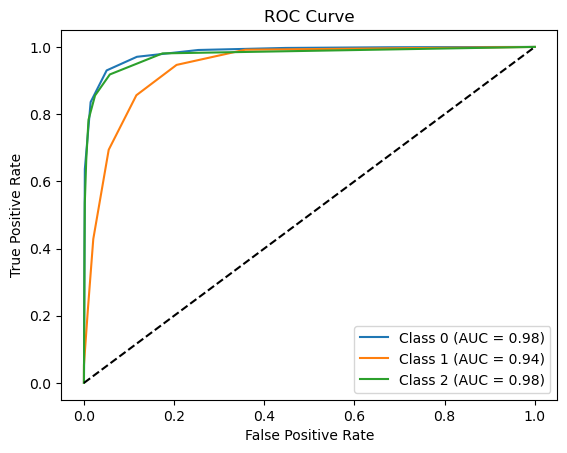

In [20]:
# نمودار ROC و AUC

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
y_prob = knn.predict_proba(X_test)

for i in range(Y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(Y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


C:\Users\parspooya\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\parspooya\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\parspooya\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\parspooya\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

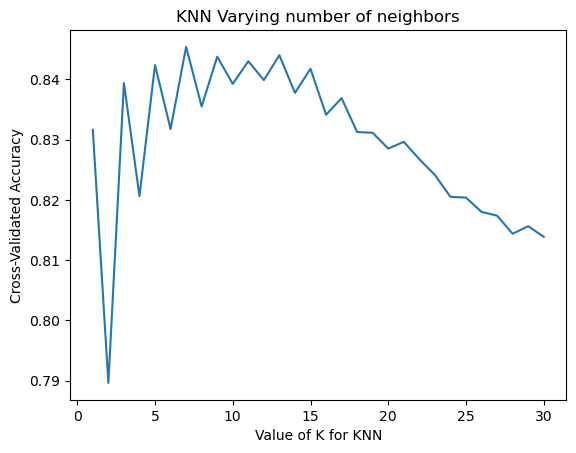

In [15]:
# نمودار دقت و خطا Kمختلف
k_range = range(1, 31)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')
    accuracies.append(scores.mean())

plt.plot(k_range, accuracies)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Varying number of neighbors')
plt.show()


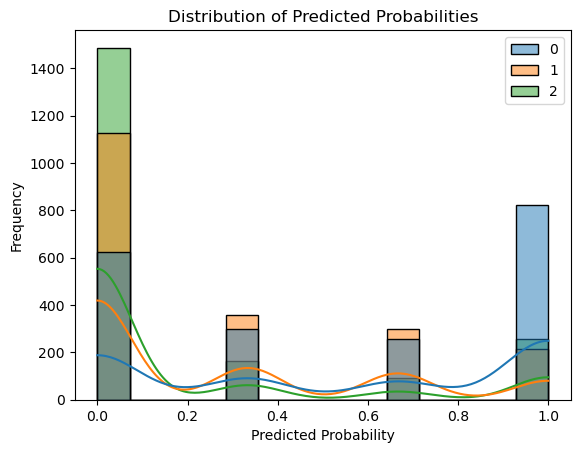

In [16]:
# نمودار توزیع پیش بینی

sns.histplot(y_prob, kde=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()
